In [23]:
from metrics import *

In [24]:
exp = "final"
data_path = f'../data/{exp}/data/'
results_path = f'../data/{exp}/results/'
# Define  length of test data
n_test = 250

In [25]:
# Prepare dataframe
models = ["brown", "powexp"]
metrics = ["MSE_r", "MSE_s", "MSE_ext", "IS_r", "IS_s", "IIS", "KL", "ES"]
results = pd.DataFrame("-", index = pd.MultiIndex.from_product([models, metrics]), columns = ["PL", "CNN", "ABC", "CNN_ES"])
results

PL CNN ABC CNN_ES
brown  MSE_r    -   -   -      -
       MSE_s    -   -   -      -
       MSE_ext  -   -   -      -
       IS_r     -   -   -      -
       IS_s     -   -   -      -
       IIS      -   -   -      -
       KL       -   -   -      -
       ES       -   -   -      -
powexp MSE_r    -   -   -      -
       MSE_s    -   -   -      -
       MSE_ext  -   -   -      -
       IS_r     -   -   -      -
       IS_s     -   -   -      -
       IIS      -   -   -      -
       KL       -   -   -      -
       ES       -   -   -      -

In [26]:
model = "brown"

In [27]:
# Load true parameters
true_parameters = np.transpose(pyreadr.read_r(data_path+model+"_test_params.RData")["test_params"].to_numpy()[0:n_test])
# Load PL
pl = np.transpose(pyreadr.read_r(results_path+model+"_pl.RData")["results"].to_numpy()[0:n_test,0:2])
# Load ABC
abc = xr.open_dataset(results_path + model + "_abc_results.nc").results.data[0:2]
abc_mean = np.mean(abc, axis = 2)
# Load normal network

# Load energy network

## Compare Metrics

In [28]:
# MSE
# PL
results.loc[(model, ["MSE_r", "MSE_s"]), "PL"] = get_mse(true_parameters, pl)
# ABC
results.loc[(model, ["MSE_r", "MSE_s"]), "ABC"] = get_mse(true_parameters, abc_mean)

In [29]:
# IMSE
# PL
results.loc[(model, "MSE_ext"), "PL"] = get_integrated_error(model, true = true_parameters, estimate = pl)
# ABC
results.loc[(model, "MSE_ext"), "ABC"] = get_integrated_error(model, true = true_parameters, estimate = abc, method = "sample")

In [30]:
results

PL CNN       ABC CNN_ES
brown  MSE_r     3.18932   -  1.614511      -
       MSE_s    0.125622   -  0.255105      -
       MSE_ext  0.453791   -  0.907181      -
       IS_r            -   -         -      -
       IS_s            -   -         -      -
       IIS             -   -         -      -
       KL              -   -         -      -
       ES              -   -         -      -
powexp MSE_r           -   -         -      -
       MSE_s           -   -         -      -
       MSE_ext         -   -         -      -
       IS_r            -   -         -      -
       IS_s            -   -         -      -
       IIS             -   -         -      -
       KL              -   -         -      -
       ES              -   -         -      -

In [7]:
# IS

# IIS

## Graphical evaluation

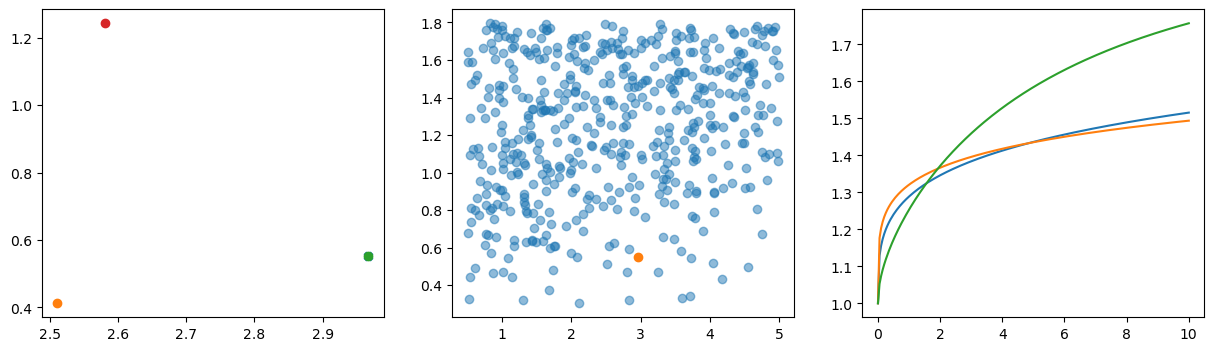

In [8]:
sample = np.random.randint(0, n_test)

h = np.linspace(0,np.sqrt(10**2),200)
fig, axs = plt.subplots(1, 3, figsize = (15,4))

#Mean values
axs[0].scatter(x = true_parameters[0, sample], y = true_parameters[1,sample], marker = "X")
axs[0].scatter(x = pl[0, sample], y = pl[1,sample])
axs[0].scatter(x = true_parameters[0, sample], y = true_parameters[1,sample])
axs[0].scatter(x = abc_mean[0, sample], y = abc_mean[1,sample])

# Sample values
axs[1].scatter(x = abc[0, sample], y = abc[1,sample], alpha = 0.5)
axs[1].scatter(x = true_parameters[0, sample], y = true_parameters[1,sample])

# Extremal coefficient
axs[2].plot(h, extremal_coefficient(h, model, true_parameters[0,sample], true_parameters[1,sample]))
axs[2].plot(h, extremal_coefficient(h, model, pl[0,sample], pl[1,sample]))
axs[2].plot(h, sample_extremal_coefficient(h, model, abc[0,sample], abc[1,sample]))


(200,)

In [8]:
abc[0,sample].shape

(500,)